In [29]:
#Maksimov Andrey MAEE'19
#Home Work 5

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
import requests
import zipfile
import os
from mpl_toolkits.basemap import Basemap

In [31]:
#Question1
#Task1

URL = 'https://drive.google.com/uc?export=download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM'
r = requests.get(URL)
with open('Directory.zip', 'wb') as code:
    code.write(r.content)
path = os.getcwd() + '/Directory.zip'
zip_ref = zipfile.ZipFile(path, 'r')
zip_ref.extractall(os.getcwd())
zip_ref.close()
#Поступаем аналогично тому, как мы делали в HW4. Сохраняем, а затем разархивируем.

In [32]:
data = pd.DataFrame.from_csv(path='survey_results_public.csv', sep = ',', header=0, encoding='utf-8')
print(data['Professional'].value_counts())
data.iloc[:,:1].head()

#Выведем состав опрошенных, как мможно заметить professional developer составляют 36131

Professional developer                                  36131
Student                                                  8224
Professional non-developer who sometimes writes code     5140
Used to be a professional developer                       983
None of these                                             914
Name: Professional, dtype: int64


,Professional
Respondent,
1,Student
2,Student
3,Professional developer
4,Professional non-developer who sometimes write...
5,Professional developer


In [33]:
schema = pd.DataFrame.from_csv(path='survey_results_schema.csv', sep = ',', header=0, encoding='utf-8')
print(len(schema))
schema.head()

154


,Question
Column,
Respondent,Respondent ID number
Professional,Which of the following best describes you?
ProgramHobby,Do you program as a hobby or contribute to ope...
Country,In which country do you currently live?
University,"Are you currently enrolled in a formal, degree..."


/Users/andrey/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/andrey/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


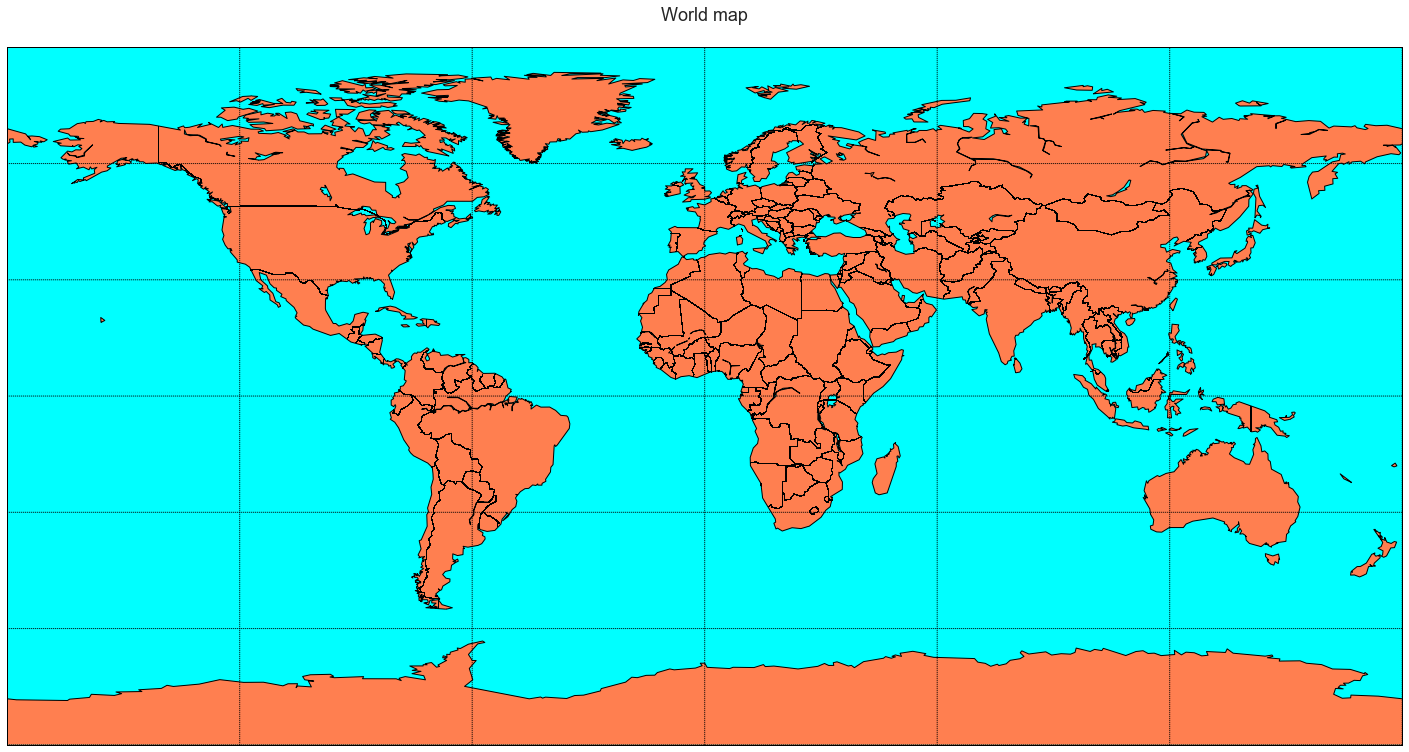

In [34]:
#Task2

plt.figure(figsize = (25,40))
m = Basemap(projection = 'cyl', llcrnrlat = -90, urcrnrlat = 90,
            llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')

m.drawcoastlines()
m.drawcountries(linewidth = 0.25, antialiased = False)
m.fillcontinents(color = 'coral',lake_color = 'aqua')
m.drawparallels(np.arange(-90., 90., 30.))
m.drawmeridians(np.arange(-180., 180., 60.))

m.drawmapboundary(fill_color = 'aqua')

plt.title("World map\n", fontsize = 18)
plt.show()

/Users/andrey/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/andrey/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/andrey/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/andrey/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


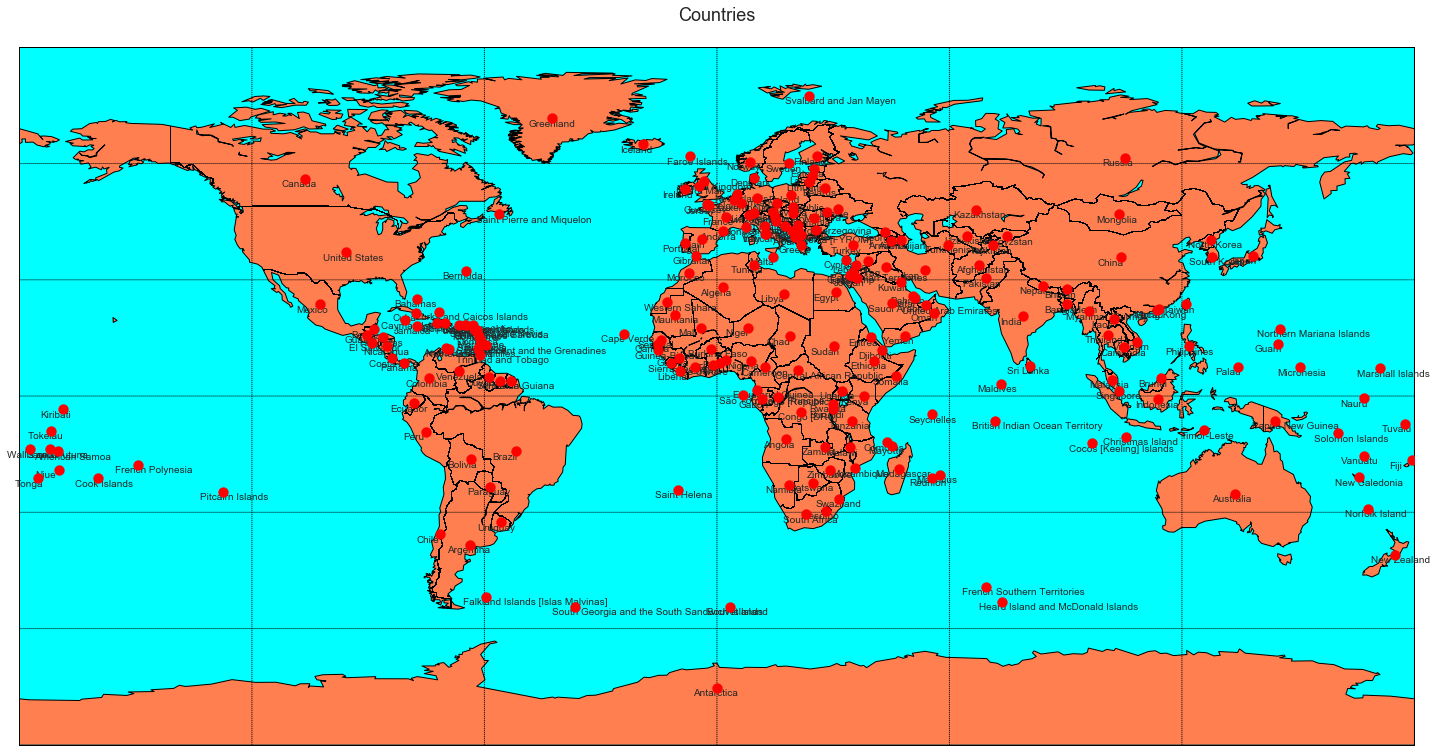

In [35]:
#Task3

URL = 'https://developers.google.com/public-data/docs/canonical/countries_csv'
coordinates = pd.read_html(URL, index_col = 0)[0]
coordinates = coordinates.drop(coordinates[(coordinates[1] == 'latitude')].index)

coordinates[1], coordinates[2] = coordinates[1].astype(float), coordinates[2].astype(float)

plt.figure(figsize = (25,40))
m = Basemap(projection='cyl',llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution='c')

m.drawcoastlines()
m.drawcountries(linewidth = 0.25, antialiased = False)
m.fillcontinents(color = 'coral',lake_color = 'aqua')
m.drawparallels(np.arange(-90., 90., 30.))
m.drawmeridians(np.arange(-180., 180., 60.))

m.drawmapboundary(fill_color = 'aqua')


coordinates = coordinates[-90 <= coordinates[1]]
coordinates = coordinates[coordinates[1] <= 90]

coordinates = coordinates[-180 <= coordinates[2]]
coordinates = coordinates[coordinates[2] <= 180]

x1, y1 = m(coordinates[2], coordinates[1])
m.scatter(x1, y1, color = 'red', s = 100, zorder=10)

for i in range(coordinates.shape[0]):
    plt.text(x1.iloc[i] - 6, y1.iloc[i] - 2, coordinates.iloc[i][3], fontsize = 10)
  
plt.title("Countries\n", fontsize = 18)
plt.show()

In [36]:
#Question2
#Скачиваем railways.zip, после этого мы его разархивируем и прописываем дополнительно путь до самой папки railways

#Task1
zf = zipfile.ZipFile('railways.zip')
zf.extractall(os.getcwd())
zf.close()

path1 = os.getcwd() + '/railways'
path2 = os.getcwd() + '/railways'

railways = pd.DataFrame.from_csv(path = path1 + '/railways201208.csv', sep = ',', header = 0, index_col = 1, encoding='utf-8')
railways = railways.reset_index() #Сбросим индексы, так как они по дефолту fr_code
railways[['date_priem', 'fr_code', 'sto_code', 'stn_code', 'dist']].head()

,date_priem,fr_code,sto_code,stn_code,dist
0,31.08.2012,1100,61400,3010,1944
1,01.08.2012,1100,61360,59250,431
2,29.08.2012,1100,81530,60530,1443
3,03.08.2012,1100,62630,1030,2150
4,02.08.2012,1100,62710,53850,1402


In [37]:
stations = pd.DataFrame.from_csv(path = path2 + '/stations.csv', sep = ',', header=0, index_col = 1, encoding='utf-8')
stations = stations.reset_index() #Сбросим индексы, так как они по дефолту stname
stations[['stshortname', 'stname', 'stcode']].head()

,stshortname,stname,stcode
0,ВЫБОРГ-ПЕРЕВ,ВЫБОРГ-ПЕРЕВАЛКА,2340
1,КАЛАШНИКОВО,КАЛАШНИКОВО,6230
2,ДОБЫВАЛОВО,ДОБЫВАЛОВО,5510
3,СРЕДНЕРОГАТС,СРЕДНЕРОГАТСКАЯ,3490
4,ЛЕВАШОВО,ЛЕВАШОВО,3880


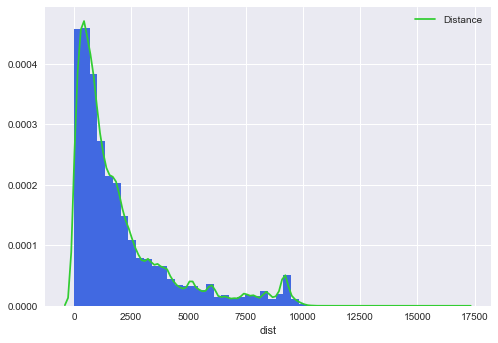

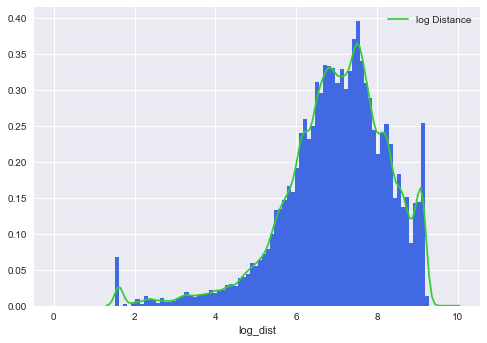

In [38]:
#Task2
#Сначала построим обычный график, цвета постараемся подобрать, как в примере
sns.distplot(railways['dist'], kde_kws = {'color' : 'limegreen','label' : 'Distance'},
             hist_kws = {'color' : 'royalblue', 'alpha' : None})
plt.show()

#Теперь построим график от log()
railways['log_dist'] = np.log(railways['dist'])

sns.distplot(railways['log_dist'], bins = np.linspace(0 , 10 , 100), kde_kws = {'color' : 'limegreen', 'label' : 'log Distance'},
             hist_kws = {'color' : 'royalblue', 'alpha' : None})
plt.show()

/Users/andrey/anaconda/lib/python3.6/site-packages/pandas/core/indexes/api.py:77: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  result = result.union(other)
/Users/andrey/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


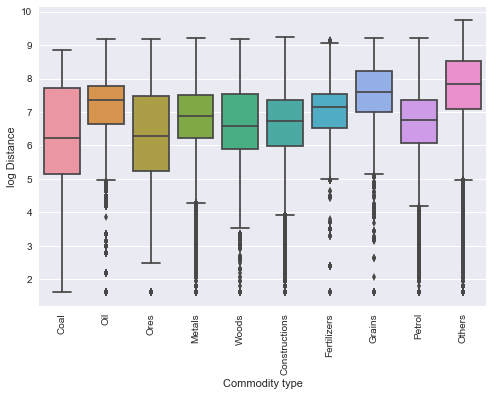

In [39]:
#Task3
commodities = pd.DataFrame(columns = ['Coal'])
commodities['Coal'] = railways[railways['commodity'] == 1]['log_dist']

#Зададим массив необходимых наименований товаров
value = ['Coal', 'Oil', 'Ores', 'Metals', 'Woods', 'Constructions', 'Fertilizers', 'Grains', 'Petrol', 'Others']

for i in range(2,11):
    commodities = pd.concat([commodities, railways[railways['commodity'] == i]['log_dist']], axis = 0, ignore_index = True)
    commodities.rename(columns = {'Coal' : 'Coal', 0 : value[i - 1]}, inplace = True)

ax = plt.axes()

sns.boxplot(commodities, ax = ax)
ax.set_xlabel('Commodity type')
ax.set_ylabel('log Distance')
plt.xticks(rotation = 'vertical')
plt.show()

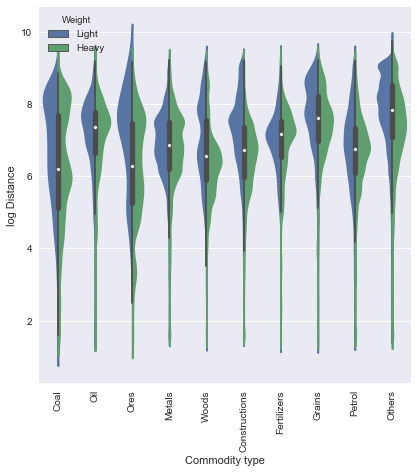

In [46]:
#Task4

media = pd.DataFrame()
commodities = pd.DataFrame(columns = ['Commodity type', 'log Distance', 'Weight'])

commodities['log Distance'] = railways['log_dist']
commodities['Commodity type'] = railways['commodity'].replace(to_replace = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], value = value)

media['check'] = railways['weight'] < railways['weight'].median()
media = media.replace(to_replace = [True, False], value = ['Light', 'Heavy']) #Заменим на True & False, чтобы было легче классифицировать
commodities['Weight'] = media

ax = plt.axes()
sns.violinplot(data = commodities, x = 'Commodity type', y = 'log Distance', hue = 'Weight', split = True,
               order = value, ax = ax, hue_order = ['Light', 'Heavy'])
ax.set_xticklabels(value, rotation = 90)
plt.show()

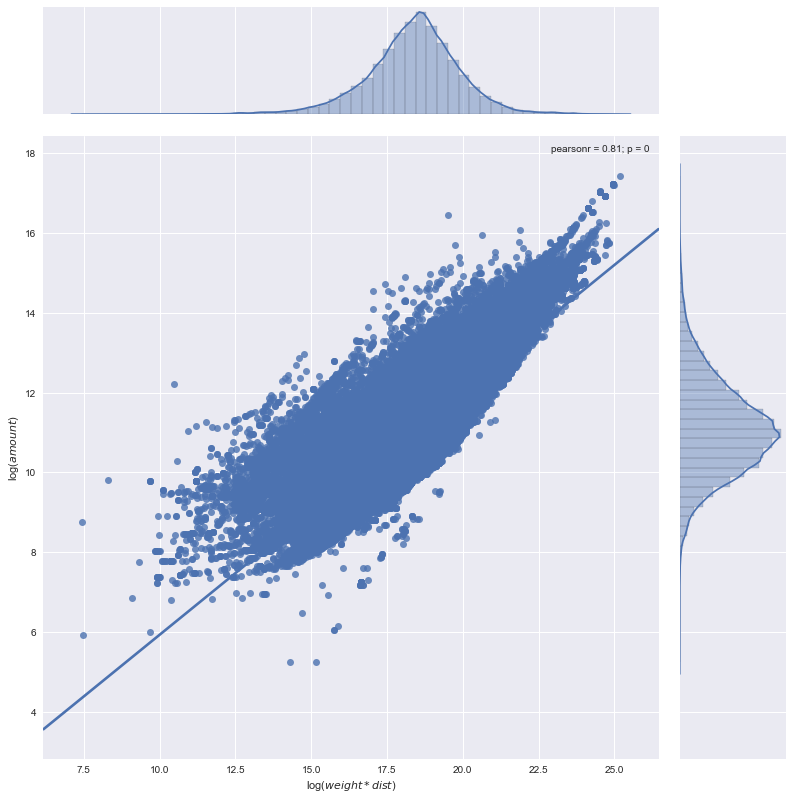

In [49]:
# Task 5

railways.drop(railways[railways['amount'] == 0].index, inplace = True)
#Удаляем значения, для которых amount == 0, так как в условиях задания нет смысла их учитывать
railways['log_amount'] = np.log(railways['amount'])
railways['weight * dist'] = np.log(railways['weight'] * railways['dist'])

result = sns.jointplot(x = 'weight * dist', y = 'log_amount', data = railways, kind = 'reg',
                  marginal_kws={'hist_kws': {'edgecolor': "black"}})

result.fig.set_figwidth(12)
result.fig.set_figheight(12)

result.set_axis_labels("log($weight*dist$)", "log($amount$)");
plt.show()